# Import modules and data

In [4]:
# pip install pygwalker

In [5]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from datetime import datetime, date
from matplotlib.ticker import ScalarFormatter
# import pygwalker as pyg

In [6]:
file_path = '/content/drive/MyDrive/Colab Notebooks/KPMG/kpmg_data.xlsx'
sheet_names = pd.ExcelFile(file_path).sheet_names
sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [7]:
# Transactions
df_transactions = pd.read_excel(file_path, sheet_name='Transactions', header=1)
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [8]:
# NewCustomerList
df_customers = pd.read_excel(file_path, sheet_name='NewCustomerList', header=1)
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

<ipython-input-8-3bf69008602a>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_customers = pd.read_excel(file_path, sheet_name='NewCustomerList', header=1)


In [9]:
# CustomerDemographic
df_demographic= pd.read_excel(file_path, sheet_name='CustomerDemographic', header=1)
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

<ipython-input-9-7f605999b30a>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_demographic= pd.read_excel(file_path, sheet_name='CustomerDemographic', header=1)


In [10]:
# CustomerAddress
df_address= pd.read_excel(file_path, sheet_name='CustomerAddress', header=1)
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# 1. Data Quality Assessment

## Transactions

In [11]:
df_transactions.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [12]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [13]:
# no duplicates in the dataset
df_transactions.duplicated().sum()

0

In [14]:
df_transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [15]:
# completeness
missing_values_tr = df_transactions.isnull().sum().sum()
missing_values_tr_per = 100*(missing_values_tr/df_transactions.size)
100-missing_values_tr_per

99.40692307692308

What`s needed to be performed:
* the product_first_sold date represented by numbers instead of dates
* handle blank values

In [16]:
# changing datatype for the column
df_transactions_clean = df_transactions.copy()
df_transactions_clean['product_first_sold_date_clean'] = pd.to_datetime(df_transactions_clean['product_first_sold_date'],unit='D', origin='1899-12-30')
df_transactions_clean.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  \
0       71.49          53.62                  41245.0   
1     2091.47         388.92                  41701.0   
2     1793.43         248.82                  36361.0   
3     1198.46         381.10                  36145.0   
4     1765.30         709.48                  42226.0   

  product_first_sold_date_clean  
0                    2012-12-02  
1                    2014-03-03  
2                    1999-07-20  
3                    1998-12-16  
4                    2015-08-10

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

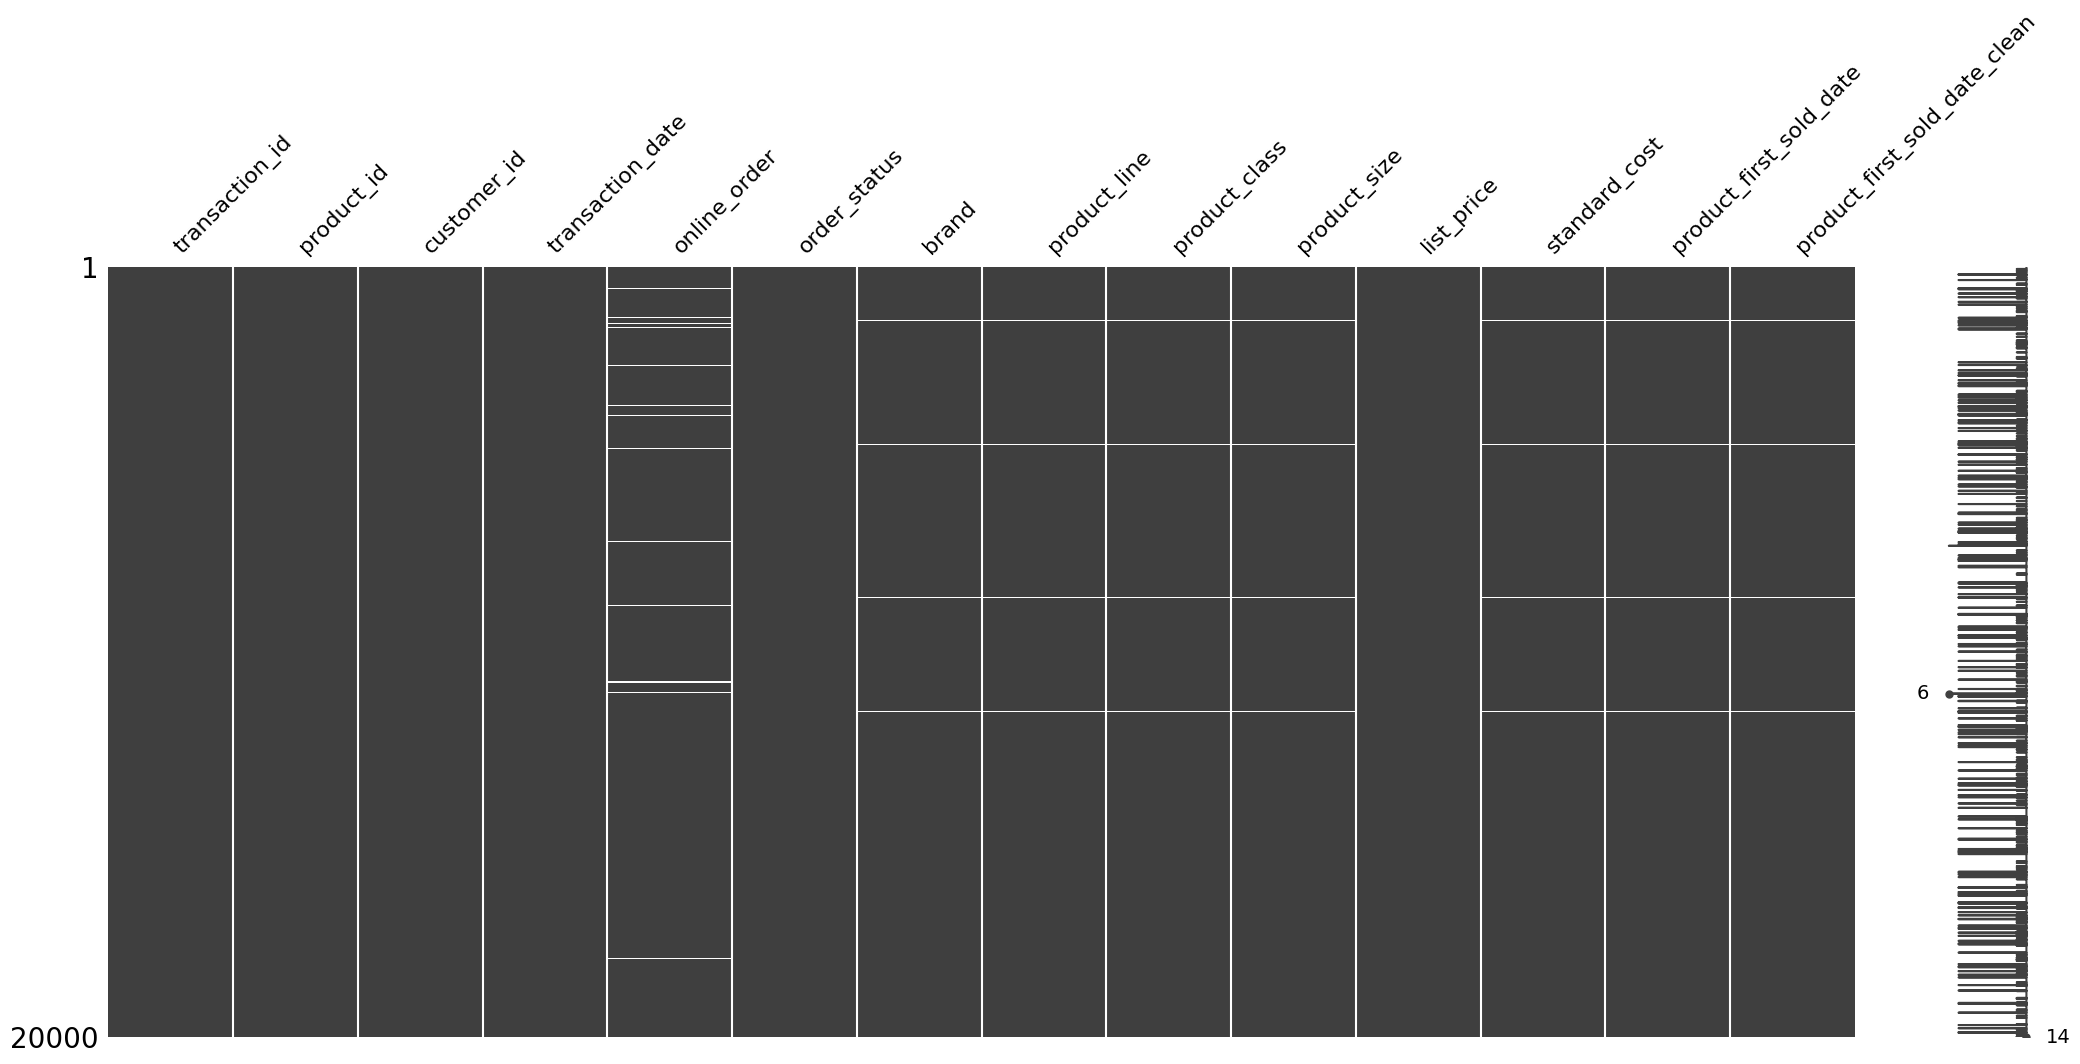

In [17]:
msno.matrix(df_transactions_clean.sort_values(by=['transaction_date']))
plt.plot

I removed 197 records where there is no any data on ['brand', 'product_line', 'product_class', 'standard_cost']

In [18]:
df_transactions_clean['brand'].isna().sum()

197

In [19]:
df_transactions_clean = df_transactions_clean.dropna(subset = ['brand'])

In [20]:
df_transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   transaction_id                 19803 non-null  int64         
 1   product_id                     19803 non-null  int64         
 2   customer_id                    19803 non-null  int64         
 3   transaction_date               19803 non-null  datetime64[ns]
 4   online_order                   19445 non-null  float64       
 5   order_status                   19803 non-null  object        
 6   brand                          19803 non-null  object        
 7   product_line                   19803 non-null  object        
 8   product_class                  19803 non-null  object        
 9   product_size                   19803 non-null  object        
 10  list_price                     19803 non-null  float64       
 11  standard_cost  

I replaced 358 null values in online_order status with 'unspecified'

In [21]:
df_transactions_clean['online_order'].isna().sum()

358

In [22]:
df_transactions_clean['online_order_cleaned'] = df_transactions_clean['online_order'].fillna('unspecified')
df_transactions_clean['online_order_cleaned'].isna().sum()

0

In [23]:
df_transactions_clean['online_order_cleaned'].value_counts(normalize = True)

1.0            0.491794
0.0            0.490128
unspecified    0.018078
Name: online_order_cleaned, dtype: float64

In [24]:
df_transactions_clean = df_transactions_clean.drop(['online_order', 'product_first_sold_date'], axis = 1)

In [25]:
df_transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   transaction_id                 19803 non-null  int64         
 1   product_id                     19803 non-null  int64         
 2   customer_id                    19803 non-null  int64         
 3   transaction_date               19803 non-null  datetime64[ns]
 4   order_status                   19803 non-null  object        
 5   brand                          19803 non-null  object        
 6   product_line                   19803 non-null  object        
 7   product_class                  19803 non-null  object        
 8   product_size                   19803 non-null  object        
 9   list_price                     19803 non-null  float64       
 10  standard_cost                  19803 non-null  float64       
 11  product_first_s

Report on Transaction table Data Quality Assessment:

The transactions dataset provides the following information:

* 20000 transactions in year 2017 in the dataset before cleaning
* There are no duplicates, there are some missing values
* 101 distinct products, 6 brands with different product classes, lines and sizes
* 3494 distinct customers
* product_first_sold_date -> need more information on what does it reffer to
* There are 358 records (2% of all transactions) where online_status not specified. I filled that with 'unspecified' so we can keep that records for further analysis
* There are 197 records (1% of all transactions) where is no any data on product attributes (brand, size, class, standard costs), so I removed those from the dataset
* don`t see any quantity sold column

## NewCustomers

In [26]:
df_customers.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0      Mass Customer                  N      Yes  ...    QLD  Australia   
1      Mass Customer                  N       No  ...    NSW  Australia   
2  Affluent Customer                  N       No  ...    VIC  Australia   
3  Affluent Customer                  N      Yes  ...    QLD  Australia   
4  Affluent Customer                  N       No  ...    NSW  Australia   

   property_valuation Unnamed: 16 Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0                   6        0.51      0.6375     0.796875     0.677344   
1                  11        0.66      0.6600     0.825000     0.701250   
2                   5        0.45      0.4500     0.450000     0.450000   
3                   1        0.64      0.8000     0.800000     0.800000   
4                   9        0.52      0.5200     0.650000     0.650000   

   Unnamed: 20  Rank     Value  
0            1     1  1.718750  
1            1     1  1.718750  
2            1     1  1.718750  
3            4     4  1.703125  
4            4     4  1.703125  

[5 rows x 23 columns]

In [27]:
# the percentage of missing values
missing_values_newc = df_customers.isnull().sum().sum()
missing_values_newc_per = 100*(missing_values_newc/df_customers.size)
missing_values_newc_per

1.3782608695652174

In [28]:
df_customers.duplicated().sum()

0

In [29]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [30]:
df_customers['DOB'].max()

Timestamp('2002-02-27 00:00:00')

In [31]:
df_customers['DOB'].isna().sum()

17

* we have 1000 customers and don`t have any ID for them
* we don`t have dob specified for 17 customers
* we have some columns with no names, but with some calculated values

In [32]:
columns_to_drop = df_customers.filter(like='Unnamed', axis=1).columns
df_customers = df_customers.drop(columns_to_drop, axis = 1)
df_customers.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  tenure              address  \
0      Mass Customer                  N      Yes      14     45 Shopko Center   
1      Mass Customer                  N       No      16    14 Mccormick Park   
2  Affluent Customer                  N       No      10  5 Colorado Crossing   
3  Affluent Customer                  N      Yes       5   207 Annamark Plaza   
4  Affluent Customer                  N       No      19    115 Montana Place   

   postcode state    country  property_valuation  Rank     Value  
0      4500   QLD  Australia                   6     1  1.718750  
1      2113   NSW  Australia                  11     1  1.718750  
2      3505   VIC  Australia                   5     1  1.718750  
3      4814   QLD  Australia                   1     4  1.703125  
4      2093   NSW  Australia                   9     4  1.703125

In [33]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

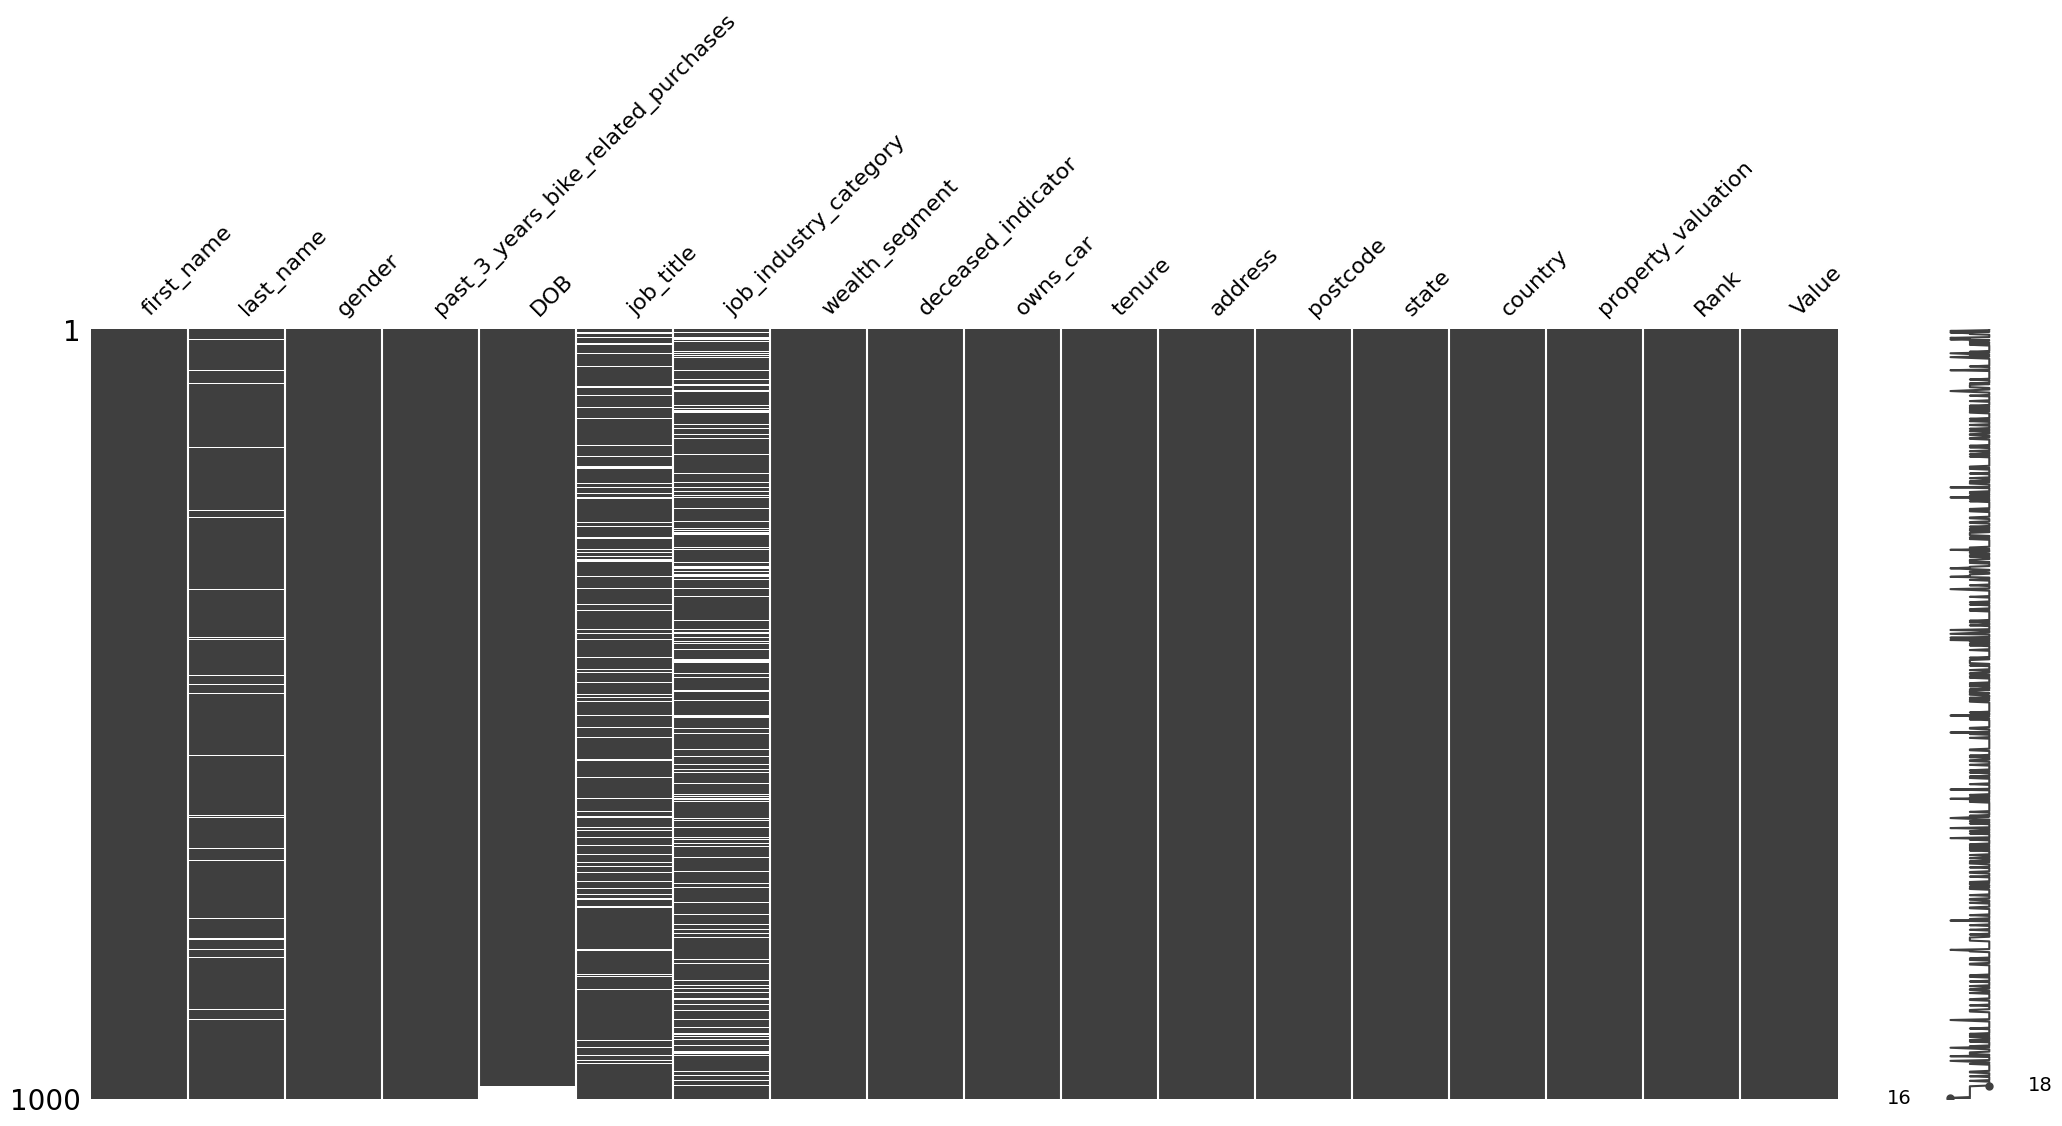

In [34]:
msno.matrix(df_customers.sort_values(by=['DOB']))
plt.plot

In [35]:
df_newcustomers_clean = df_customers.copy()

In [36]:
absent_data = ['job_title', 'job_industry_category', 'last_name']
df_newcustomers_clean[absent_data] = df_newcustomers_clean[absent_data].fillna('unspecified')
df_newcustomers_clean['last_name'].isna().sum()

0

In [37]:
df_newcustomers_clean = df_newcustomers_clean.dropna(subset = ['DOB'])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

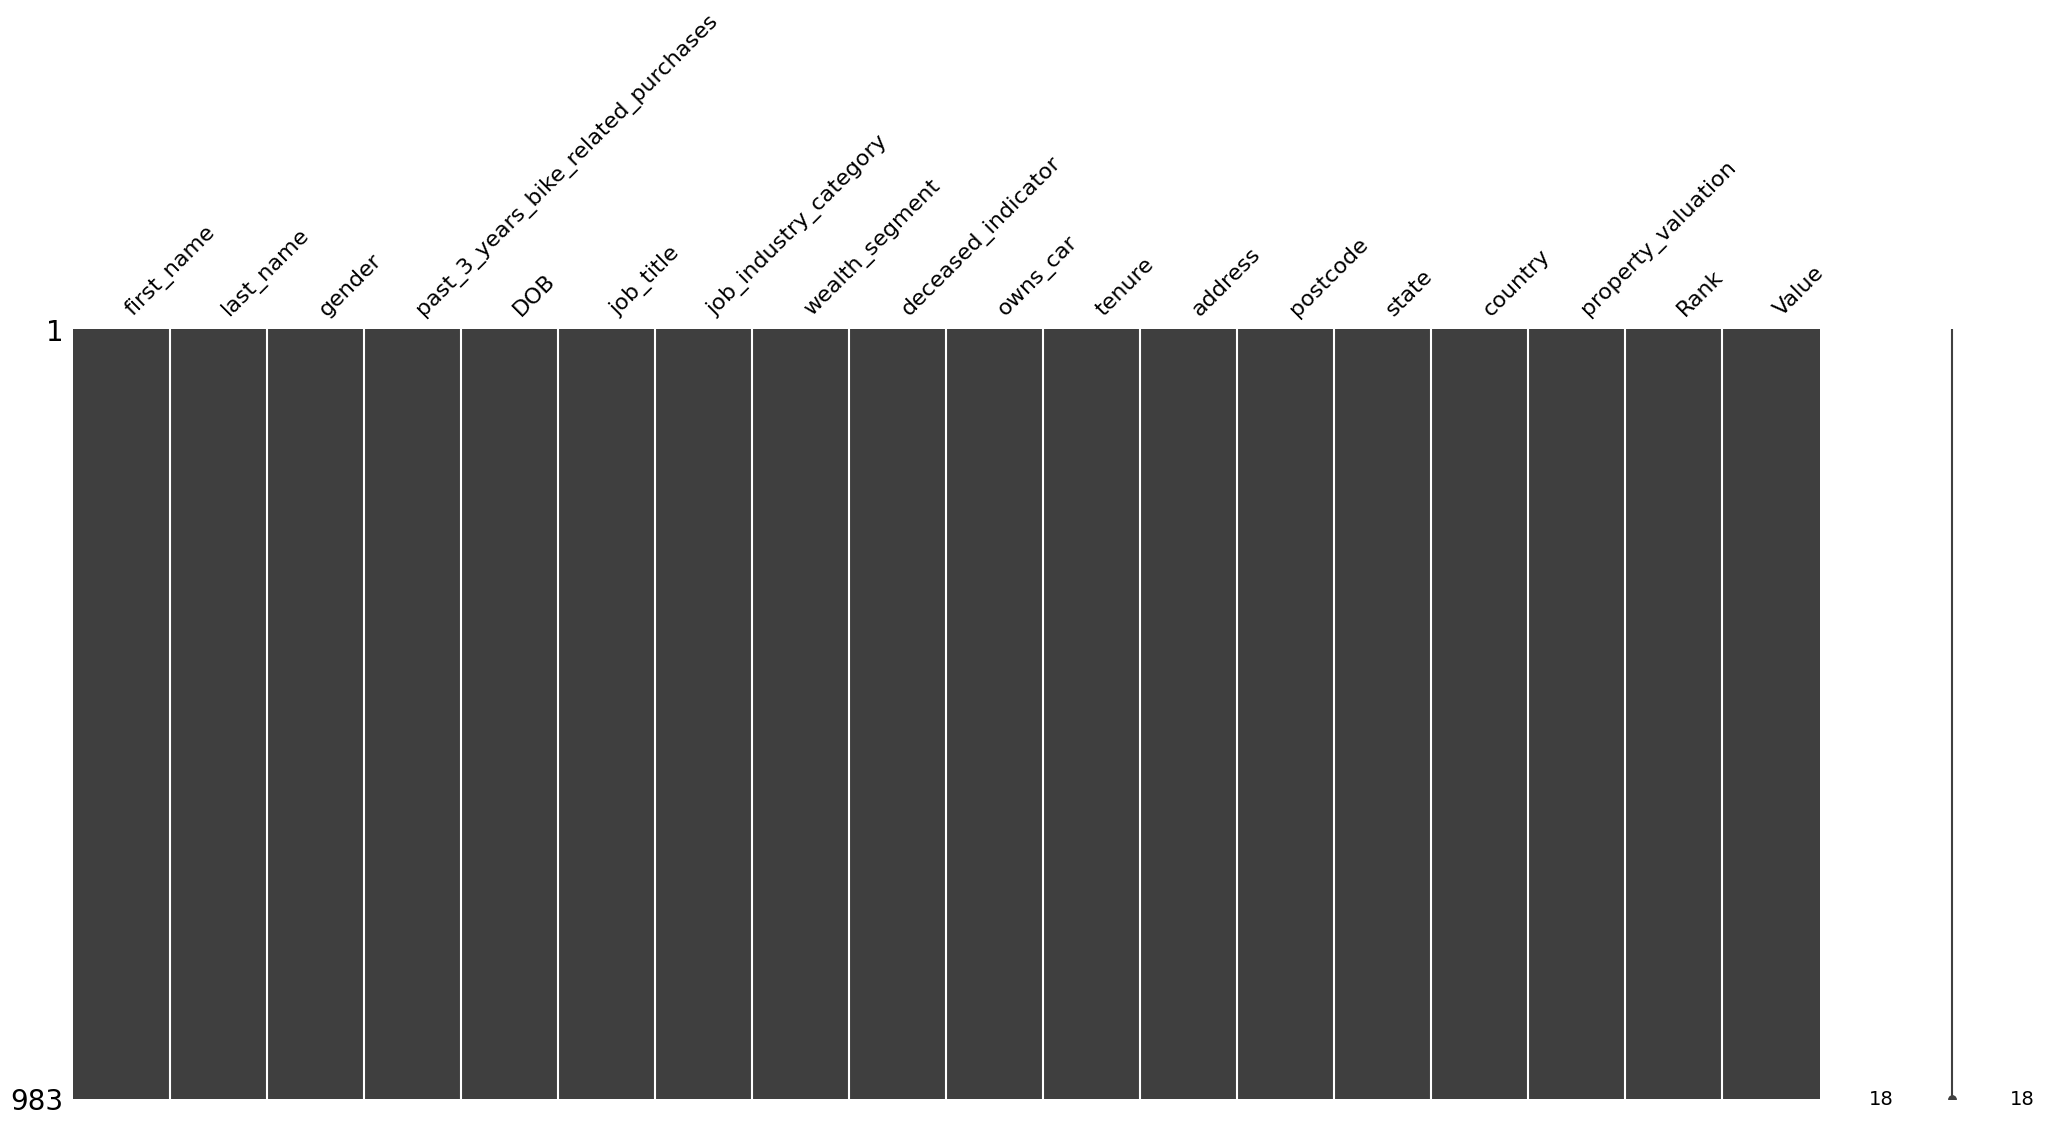

In [38]:
msno.matrix(df_newcustomers_clean.sort_values(by=['DOB']))
plt.plot

In [39]:
df_newcustomers_clean.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [40]:
df_customers['past_3_years_bike_related_purchases'].dtype

dtype('int64')

In [41]:
df_newcustomers_clean['Value'].value_counts()

0.637500    13
1.062500    12
0.892500     9
0.945625     9
1.237500     9
            ..
0.773500     1
0.605625     1
0.610938     1
0.770312     1
0.340000     1
Name: Value, Length: 324, dtype: int64

Report on New Customer table Data Quality Assessment:
* 1000 customers and don`t have any ID for them
* we don`t have DOB specified for 17 customers
* we have some columns with no names, but with some calculated values - removed

## Demographic

In [42]:
df_demographic.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property      Mass Customer                  N   
3                    IT      Mass Customer                  N   
4                   NaN  Affluent Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0

In [43]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [44]:
# the percentage of missing values
missing_values_dem = sum(df_demographic.isnull().sum())
missing_values_dem_per = 100*missing_values_dem/df_demographic.size
missing_values_dem_per

3.3903846153846153

In [45]:
df_demographic.duplicated().sum()

0

In [46]:
df_demographic['last_name'].isna().sum()

125

In [47]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
df_demographic[df_demographic['customer_id']==1]

In [48]:
df_demographic['customer_id'].duplicated().sum()

0

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

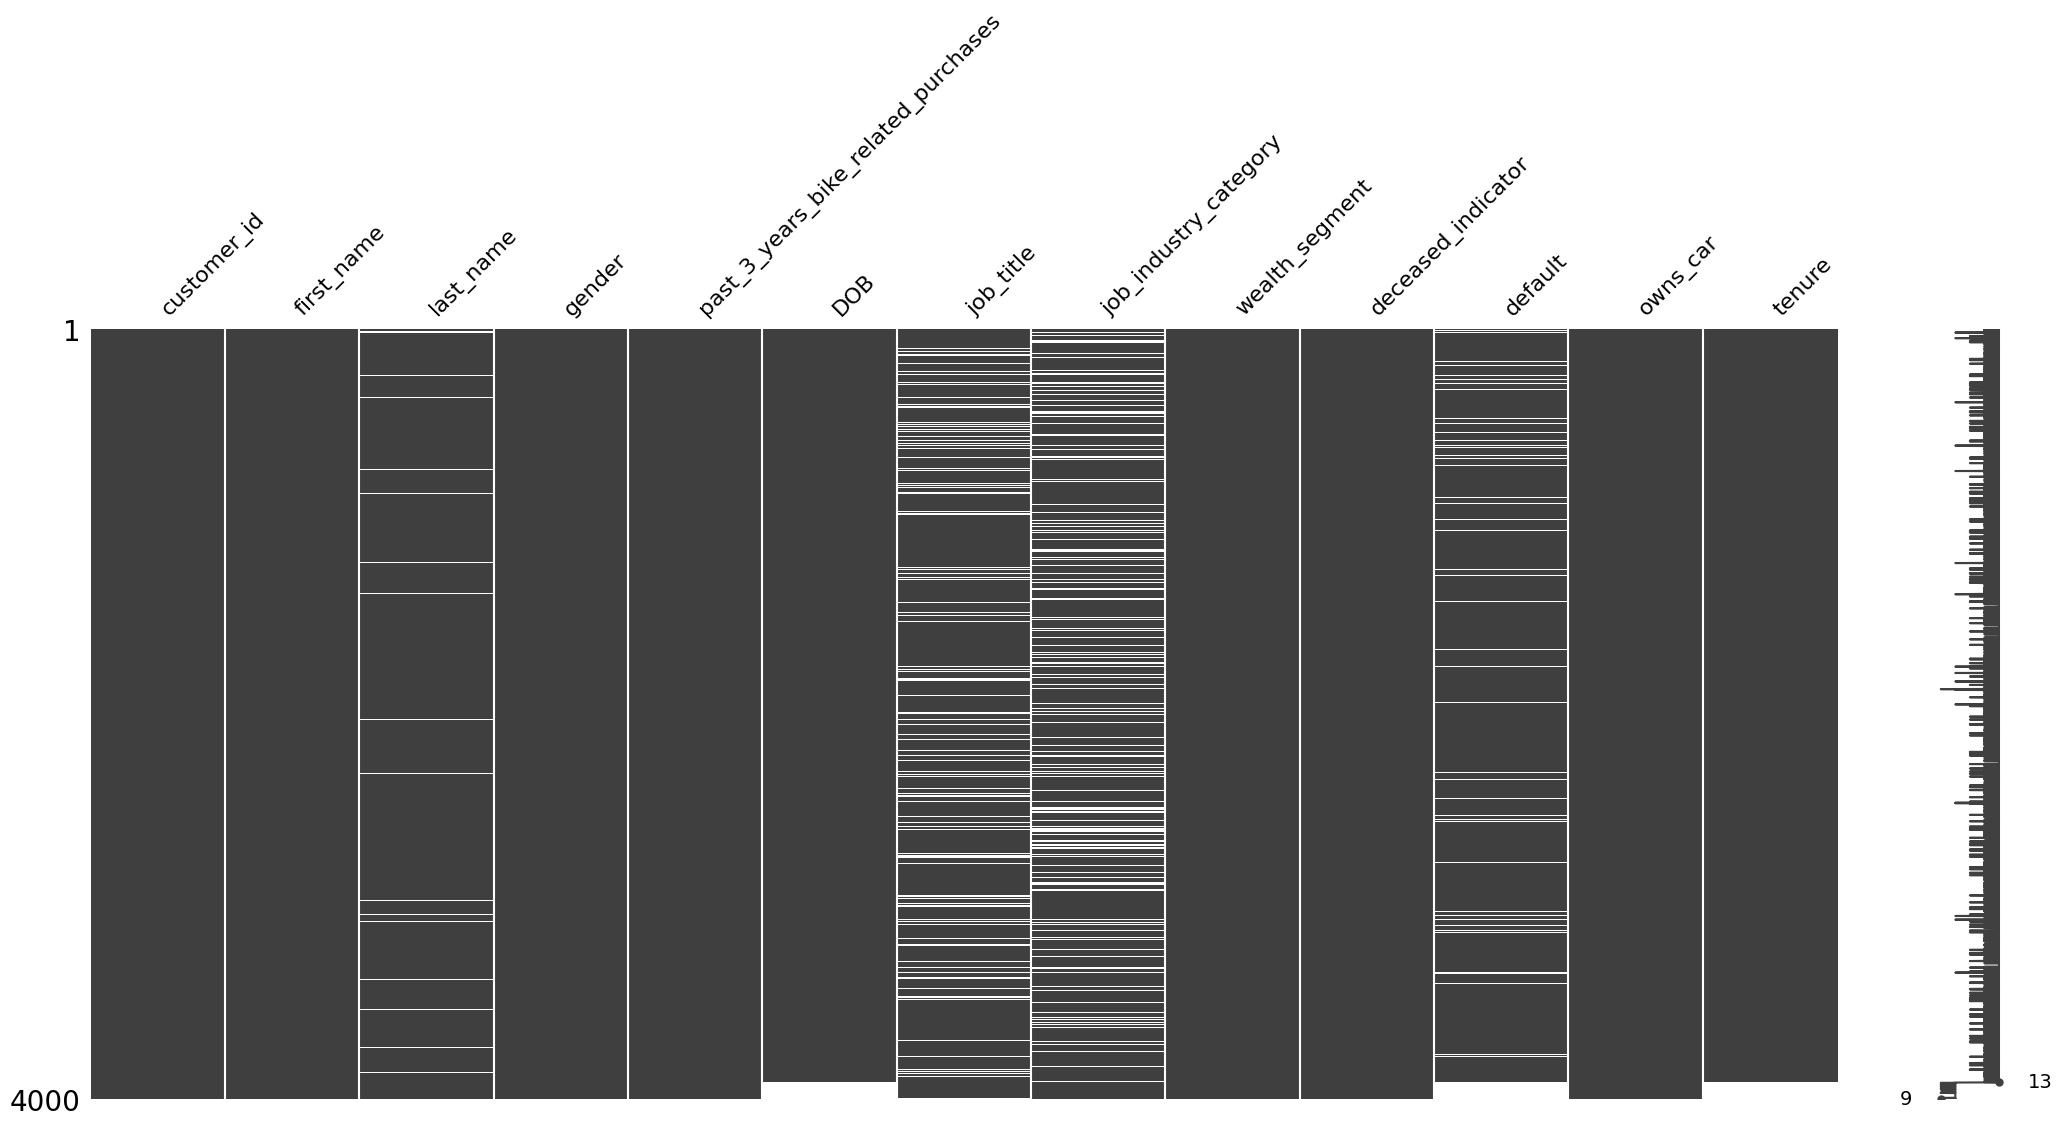

In [49]:
msno.matrix(df_demographic.sort_values(by=['DOB']))
plt.plot

In [50]:
df_demographic_clean = df_demographic.copy()

Gender represented by not allowable values, which I replaced with F/M/U

In [51]:
df_demographic_clean['gender'] = df_demographic_clean['gender'].replace(['Female', 'F', 'Femal'], 'F', regex=True)
df_demographic_clean['gender'] = df_demographic_clean['gender'].replace(['Male', 'M'], 'M', regex=True)

DOB doesn't match range constraint: its 1843-12-21 indicated. I removed everything before 1931 year and missing values (87 customers, for whom columns default and tenure also blanks) and 2 deceased customer also removed

In [52]:
df_demographic_clean = df_demographic_clean[(df_demographic_clean['DOB'] >= '1931')& (df_demographic_clean['deceased_indicator']=='N')]

In [53]:
df_demographic_clean['DOB'].max()

Timestamp('2002-03-11 00:00:00')

497 customers didn`t specify job_title and 656 customers didnt specify job_industry_category and 125 customers didnt specify last_name -> '*unspecified*'

In [54]:
df_demographic_clean['job_industry_category'].isna().sum()

656

In [55]:
blank_jobs_col = ['job_title','job_industry_category']
df_demographic_clean[blank_jobs_col] = df_demographic_clean[blank_jobs_col].fillna('unspecified')

In [56]:
df_demographic_clean['job_title'].isna().sum()

0

In [57]:
df_demographic_clean['tenure'].min()

1.0

In [58]:
df_demographic_clean.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

default column is interpretable and thus removed

In [59]:
df_demographic_clean = df_demographic_clean.drop(['default'], axis=1)

In [60]:
blank_jobs_col = ['last_name', 'job_title', 'job_industry_category']
df_demographic_clean[blank_jobs_col] = df_demographic_clean[blank_jobs_col].fillna('unspecified')

In [61]:
df_demographic_clean['last_name'].isna().sum()

0

Report:
* 4000 distinct customers id in the dataset before cleaning
* no duplicated records
* Gender represented by not allowable values, which I replaced with F/M/U
* Missing data: 497 job_title, 656 job_industry_category, 125 last_name -> unspecified category
* DOB doesn't match range constraint: its 1843-12-21 indicated for 1 customer. I removed everything before 1931 year and missing values (87 customers, for whom columns default and tenure also blanks) and 2 deceased customer also removed
* default column is not interpretable, dropped

## CustomerAddress

In [62]:
df_address.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [63]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [64]:
missing_values_add = sum(df_address.isnull().sum())
missing_values_add_per = 100*missing_values_add/df_address.size
missing_values_add_per

0.0

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

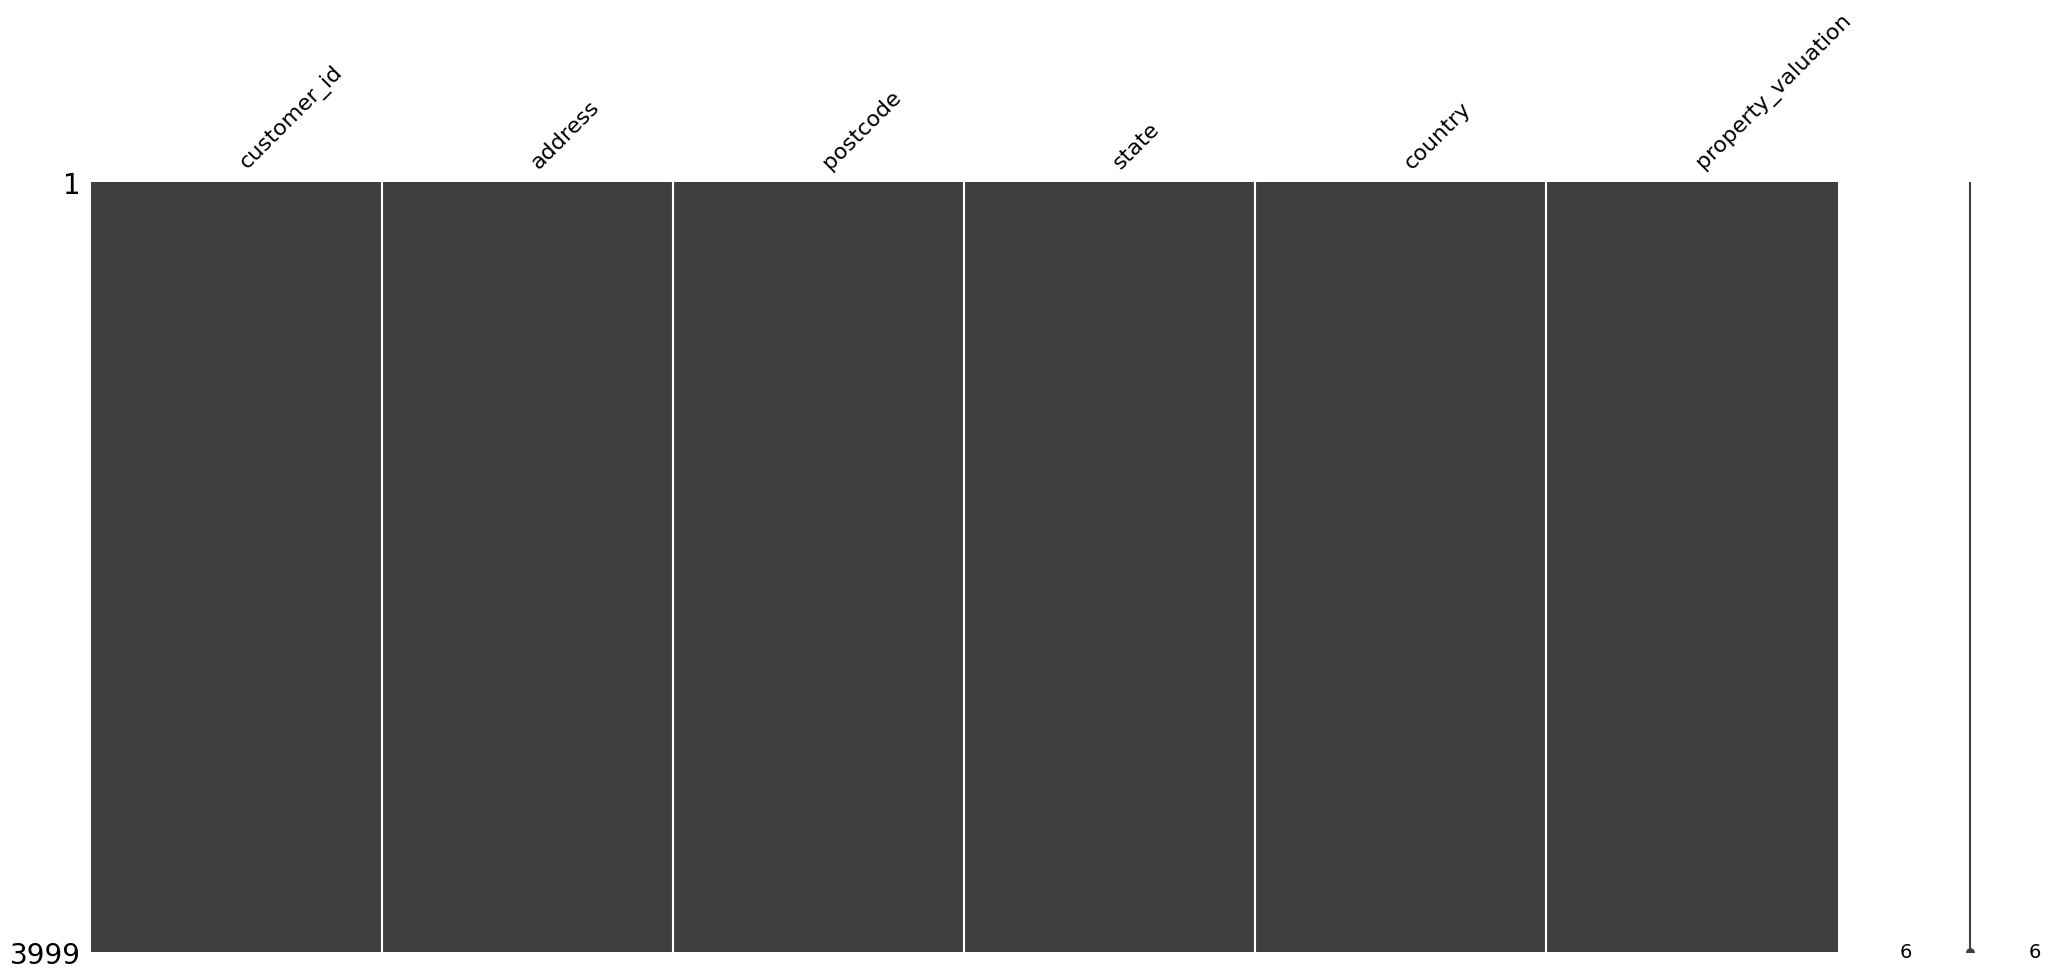

In [65]:
msno.matrix(df_address)
plt.plot

In [66]:
df_address.duplicated().sum()

0

We should rename states New South Wales with existing spelling NSW and Victoria with VIC

In [67]:
df_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [68]:
df_address_clean = df_address.copy()

In [69]:
states = {'New South Wales':'NSW',
          'Victoria':'VIC'}
df_address_clean['state'] = df_address_clean['state'].replace(states)

In [70]:
df_address_clean

customer_id                    address  postcode state    country  \
0               1         060 Morning Avenue      2016   NSW  Australia   
1               2        6 Meadow Vale Court      2153   NSW  Australia   
2               4         0 Holy Cross Court      4211   QLD  Australia   
3               5        17979 Del Mar Point      2448   NSW  Australia   
4               6           9 Oakridge Court      3216   VIC  Australia   
...           ...                        ...       ...   ...        ...   
3994         3999            1482 Hauk Trail      3064   VIC  Australia   
3995         4000  57042 Village Green Point      4511   QLD  Australia   
3996         4001     87 Crescent Oaks Alley      2756   NSW  Australia   
3997         4002           8194 Lien Street      4032   QLD  Australia   
3998         4003            320 Acker Drive      2251   NSW  Australia   

      property_valuation  
0                     10  
1                     10  
2                      9  
3                      4  
4                      9  
...                  ...  
3994                   3  
3995                   6  
3996                  10  
3997                   7  
3998                   7  

[3999 rows x 6 columns]

In [71]:
df_address_clean['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

Merging datasets with Customer ID

In [72]:
df_merged = pd.merge(df_demographic_clean, df_address_clean, on='customer_id')
len(df_merged)

3906

In [73]:
df_merged = pd.merge(df_demographic, df_address, on='customer_id')
len(df_merged)

3996

In [74]:
df_demo_miss = df_demographic[~df_demographic['customer_id'].isin(df_address['customer_id'])]
df_address_miss = df_address[~df_address['customer_id'].isin(df_demographic['customer_id'])]
df_both_miss = pd.concat([df_demo_miss['customer_id'],
                          df_address_miss['customer_id']])
df_both_miss.unique()

array([   3,   10,   22,   23, 4001, 4002, 4003])

In [75]:
df_address_miss = df_address[~df_address['customer_id'].isin(df_demographic['customer_id'])]
df_address_miss

customer_id                 address  postcode state    country  \
3996         4001  87 Crescent Oaks Alley      2756   NSW  Australia   
3997         4002        8194 Lien Street      4032   QLD  Australia   
3998         4003         320 Acker Drive      2251   NSW  Australia   

      property_valuation  
3996                  10  
3997                   7  
3998                   7

Report on Castomer address table Data Quality Assessment:

* There are 3999 customers with adderesses
* No duplicates
* no missing values
* renamed states New South Wales with existing spelling NSW and Victoria with VIC
* Comparing 2 datasets with customer_id we don`t have the following customer ID in address table: 3, 10,22,23, and the following in demographic table: 4001, 4002, 4003.
* lack of context on property_valuation column


## Report on Data Quality Assessment


**Transaction Table:**

*   The initial dataset contained 20,000 transactions from the year 2017.
*   No duplicate transactions were found, but missing values were present.
*   There are 101 distinct products, 6 brands with different attributes.
*   3,494 distinct customers were identified.
*   Some records lack clarity regarding product_first_sold_date.
*   358 records (2% of transactions) had unspecified online_status, which was filled as 'unspecified' for analysis.
*   197 records (1% of transactions) with missing product attributes were removed.
*   No column for quantity sold was observed.

**New Customer Table:**

*   The table includes 1,000 customers without assigned IDs.
*   17 customers lack specified dates of birth (DOB).
*   Columns without names containing calculated values were removed.

**Customers Demographic Table:**



*   Initially, 4,000 distinct customer IDs were present.
*   No duplicated records were found.
*   Gender values were replaced with F/M/U.
*   Missing data in job-related columns (job_title, job_industry_category, last_name) was filled with 'unspecified'.
*   DOB values before 1931 and inconsistent values were removed.
*   The unclear 'default' column was dropped.

**Customer Address Table:**

*   Addresses are available for 3,999 customers.
*   No duplicate records were identified.
*   No missing values were present.
*   State names were standardized (New South Wales to NSW, Victoria to VIC).
*   Differences in customer IDs between tables were noted (e.g., missing IDs: 3, 10, 22, 23, 4001, 4002, 4003).
*   The context of the property_valuation column is unclear.

# Data Insights

## Data Preparation

In [78]:
# Transactions table preparation
cond_1 = df_transactions_clean['order_status'] != 'Cancelled'
cond_2 = df_transactions_clean['online_order_cleaned'] != 'unspecified'
df_transactions_model = df_transactions_clean[(cond_1) & cond_2]
# Calculating profit
df_transactions_model['profit'] = df_transactions_model['list_price'] - df_transactions_model['standard_cost']
df_transactions_model.head()

<ipython-input-78-0d99b22f76cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_model['profit'] = df_transactions_model['list_price'] - df_transactions_model['standard_cost']


transaction_id  product_id  customer_id transaction_date order_status  \
0               1           2         2950       2017-02-25     Approved   
1               2           3         3120       2017-05-21     Approved   
2               3          37          402       2017-10-16     Approved   
3               4          88         3135       2017-08-31     Approved   
4               5          78          787       2017-10-01     Approved   

            brand product_line product_class product_size  list_price  \
0           Solex     Standard        medium       medium       71.49   
1   Trek Bicycles     Standard        medium        large     2091.47   
2      OHM Cycles     Standard           low       medium     1793.43   
3  Norco Bicycles     Standard        medium       medium     1198.46   
4  Giant Bicycles     Standard        medium        large     1765.30   

   standard_cost product_first_sold_date_clean online_order_cleaned   profit  
0          53.62                    2012-12-02                  0.0    17.87  
1         388.92                    2014-03-03                  1.0  1702.55  
2         248.82                    1999-07-20                  0.0  1544.61  
3         381.10                    1998-12-16                  0.0   817.36  
4         709.48                    2015-08-10                  1.0  1055.82

In [ ]:
# newcustomers table preparation
df_newcustomers_model = df_newcustomers_clean[~df_newcustomers_clean[['job_title', 'job_industry_category']].isin(['unspecified']).any(axis=1)]
# changing format for gender field
gender_replace = {'Male':'M', 'Female':'F'}
df_newcustomers_model.loc[:,'gender'] = df_newcustomers_clean['gender'].replace(gender_replace)
# Calculating customers Age
df_newcustomers_model['age'] = df_newcustomers_model['DOB'].apply(age)
df_newcustomers_model.head()

In [ ]:
# demographic table preparation
df_demographic_model = df_demographic_clean[~df_demographic_clean[['job_title', 'job_industry_category']].isin(['unspecified']).any(axis=1)]
df_demographic_model.head()
# Calculating customers Age
df_demographic_model['age'] = df_demographic_model['DOB'].apply(age)
df_demographic_model

In [81]:
# CustomerAddress table preparation
df_address_model = df_address_clean.copy()

In [82]:
# merging 3 datasets
df_model = pd.merge(df_transactions_model,df_demographic_model, on='customer_id').merge(df_address_model, on='customer_id')
len(df_model['customer_id'].unique())

2519

In [77]:
# creating Age bins
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

bins = [0,10,20,30,40,50,60,70,80,90,100]
df_model['age_group'] = pd.cut(df_model['age'], bins=bins)
df_model['age_group'].value_counts()

In [84]:
df_model.to_csv('/content/drive/MyDrive/Colab Notebooks/KPMG/df_model.csv', index=False)

In [190]:
# dim_tbl for customers
df_dim_customers = df_model.groupby(['customer_id', 'first_name', 'last_name', 'age_group', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'address', 'postcode', 'state', 'country'])['past_3_years_bike_related_purchases'].min().reset_index().copy()
df_dim_customers.drop_duplicates(keep='first', inplace = True)
df_dim_customers

customer_id   first_name  last_name age_group gender  \
0               1      Laraine  Medendorp  (60, 70]      F   
1               2          Eli    Bockman  (40, 50]      M   
2               9         Mala       Lind  (40, 50]      F   
3              12      Sawyere   Flattman  (20, 30]      M   
4              13     Gabriele   Norcross  (60, 70]      M   
...           ...          ...        ...       ...    ...   
2514         3493       Jeffie      Eakly  (50, 60]      M   
2515         3494       Robers     Richen  (20, 30]      M   
2516         3495  Constantine   Frissell  (30, 40]      F   
2517         3496        Danya   Burnyeat  (30, 40]      M   
2518         3497         Thia      O'Day  (30, 40]      F   

                                 job_title job_industry_category  \
0                      Executive Secretary                Health   
1                   Administrative Officer    Financial Services   
2     Business Systems Development Analyst           Argiculture   
3                   Nuclear Power Engineer         Manufacturing   
4                              Developer I    Financial Services   
...                                    ...                   ...   
2514                  Research Assistant I                Health   
2515             Account Representative IV           Argiculture   
2516                        Programmer III    Financial Services   
2517                                Editor         Manufacturing   
2518           Administrative Assistant IV         Manufacturing   

         wealth_segment owns_car                  address  postcode state  \
0         Mass Customer      Yes       060 Morning Avenue      2016   NSW   
1         Mass Customer      Yes      6 Meadow Vale Court      2153   NSW   
2     Affluent Customer      Yes          97736 7th Trail      2023   NSW   
3         Mass Customer       No  44339 Golden Leaf Alley      4557   QLD   
4        High Net Worth      Yes      2 Sutherland Street      3799   VIC   
...                 ...      ...                      ...       ...   ...   
2514     High Net Worth       No      3 Monument Crossing      2090   NSW   
2515     High Net Worth       No           35 Chive Alley      2033   NSW   
2516     High Net Worth       No            1 Dayton Park      2767   NSW   
2517      Mass Customer      Yes      2565 Caliangt Point      2171   NSW   
2518  Affluent Customer      Yes      96 Delladonna Trail      3976   VIC   

        country  past_3_years_bike_related_purchases  
0     Australia                                   93  
1     Australia                                   81  
2     Australia                                   97  
3     Australia                                   58  
4     Australia                                   38  
...         ...                                  ...  
2514  Australia                                   30  
2515  Australia                                   72  
2516  Australia                                   57  
2517  Australia                                   99  
2518  Australia                                   73  

[2519 rows x 14 columns]

## RFM Analysis

In [5]:
df_model = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG/df_model.csv')
df_model.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date_clean', 'online_order_cleaned', 'profit',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'age_group'],
      dtype='object')

In [6]:
customers_nmb = len(df_model['customer_id'].unique())
print('# of customers:', customers_nmb)
df_shape = df_model.shape
print('df shape:', df_shape)

# of customers: 2519
df shape: (13910, 32)


In [7]:
# adding column for recency as diff between recent day and transaction_day
recent_day = pd.to_datetime(df_model['transaction_date'].max())
df_model['recency'] = (recent_day -  pd.to_datetime(df_model['transaction_date'])).dt.days
df_model[['transaction_date', 'recency']].head()

transaction_date  recency
0       2017-02-25      308
1       2017-10-16       75
2       2017-04-26      248
3       2017-05-21      223
4       2017-10-05       86

In [8]:
# creating rfm dataframe
columns = ['recency', 'transaction_id', 'profit']
calc = {'recency': 'min', 'transaction_id': 'count', 'profit': 'sum'}
fields_name = {'recency': 'recency', 'transaction_id': 'frequency', 'profit': 'monetary'}
df_rfm = df_model.pivot_table(index = 'customer_id', values = columns, aggfunc = calc).rename(columns = fields_name)
df_rfm.head()

monetary  recency  frequency
customer_id                              
1             3018.09        7         11
2             2226.26      128          3
9             2353.11       78          6
12            3540.03       67          7
13            4337.38       27          7

In [9]:
# calculating statistics for each column
r_stat = {
    'min': df_rfm['recency'].min(),
    'low_quartile': np.percentile(df_rfm['recency'], 25),
    'median': np.median(df_rfm['recency']),
    'high_quartile': np.percentile(df_rfm['recency'], 75),
    'max': df_rfm['recency'].max()
}

f_stat = {
    'min': df_rfm['frequency'].min(),
    'low_quartile': np.percentile(df_rfm['frequency'], 25),
    'median': np.median(df_rfm['frequency']),
    'high_quartile': np.percentile(df_rfm['frequency'], 75),
    'max': df_rfm['frequency'].max()
}

m_stat = {
    'min': df_rfm['monetary'].min(),
    'low_quartile': np.percentile(df_rfm['monetary'], 25),
    'median': np.median(df_rfm['monetary']),
    'high_quartile': np.percentile(df_rfm['monetary'], 75),
    'max': df_rfm['monetary'].max()
}
m_stat

{'min': 15.080000000000004,
 'low_quartile': 1766.355,
 'median': 2785.0400000000004,
 'high_quartile': 4063.625,
 'max': 11668.949999999999}

In [10]:
# function to calculate score_field
def calculate_score(column, stats):
  return np.where(column <= stats['low_quartile'], 4,
                               np.where(column <= stats['median'], 3,
                                        np.where(column <= stats['high_quartile'], 2, 1)))

In [11]:
# adding score columns
df_rfm['r_score'] = calculate_score(df_rfm['recency'], r_stat)
df_rfm['f_score'] = calculate_score(df_rfm['frequency'], f_stat)
df_rfm['m_score'] = calculate_score(df_rfm['monetary'], m_stat)

In [12]:
# creating Customer`s profile
df_rfm['rfm_profile'] = (df_rfm['r_score'].astype(str)+df_rfm['f_score'].astype(str)+df_rfm['m_score'].astype(str)).astype(int)

In [13]:
# Define a function to determine the category
def determine_category(rfm):
    if rfm >= 411:
        return 'Platinum'
    elif rfm >= 311:
        return 'Gold'
    elif rfm >= 211:
        return 'Silver'
    else:
        return 'Bronze'

# Apply the function to create the 'Category' column
df_rfm['customer_category'] = df_rfm.apply(lambda row: determine_category(row['rfm_profile']), axis=1)
df_rfm['customer_category'].value_counts()

Platinum    639
Gold        630
Bronze      628
Silver      622
Name: customer_category, dtype: int64

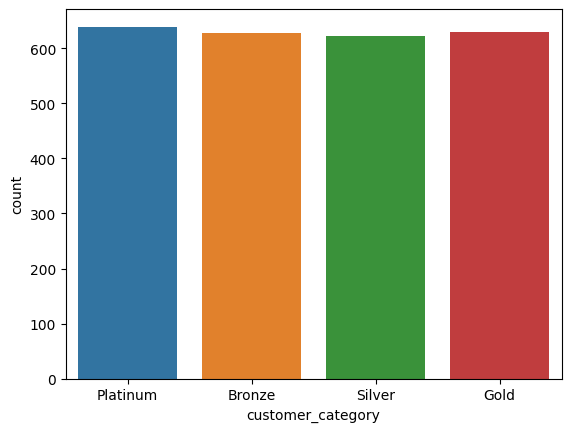

In [15]:
sns.countplot(x = 'customer_category',
             data = df_rfm)
            #  hue = 'location',)
plt.show()

In [174]:
# creating RFM matrix
df_rfm_heat = df_rfm.pivot_table(index=['r_score', 'f_score'], columns='m_score', values='monetary', aggfunc='count', fill_value=0)
df_rfm_heat = df_rfm_heat.sort_index(ascending=[False, False])
df_rfm_heat = df_rfm_heat.sort_index(axis=1, ascending=False)
df_rfm_heat.head()

m_score           4   3   2    1
r_score f_score                 
4       4        75  45  27    7
        3        16  43  33   14
        2        21  60  65   59
        1         0  14  43  117
3       4        86  52  24    3

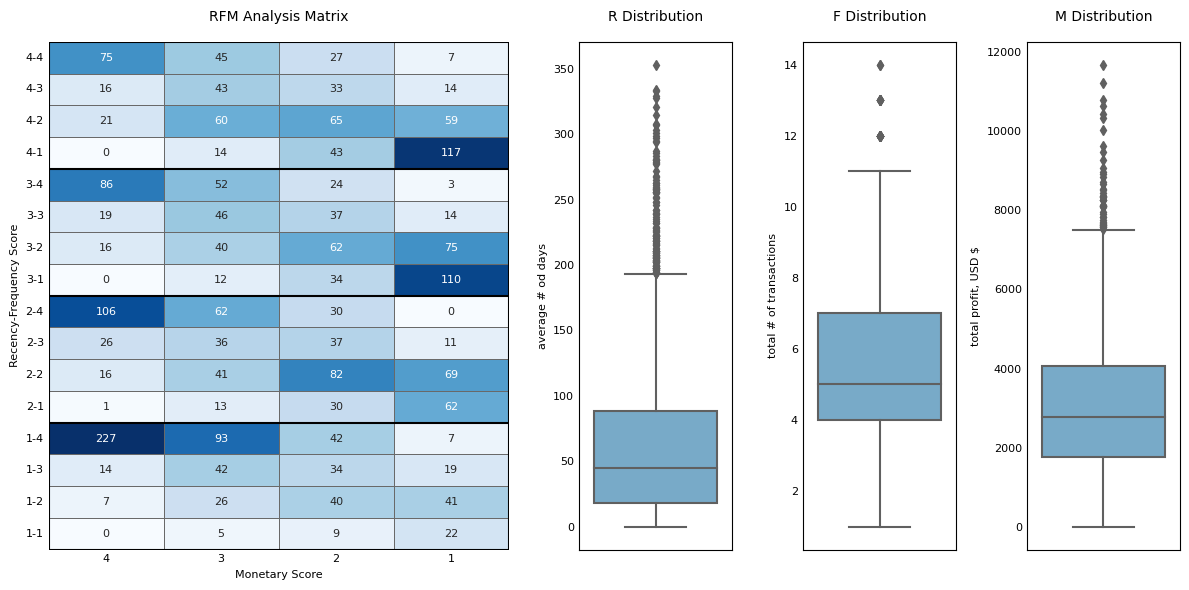

In [ ]:
# Create RFM visualization

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[3, 1, 1,1])

# Create a heatmap using seaborn with conditional formatting
ax1 = plt.subplot(gs[0])
sns.heatmap(df_rfm_heat,
            vmin=0, vmax=120,
            annot=True,
            cmap='Blues',
            fmt='d',
            annot_kws={'size': 8},
            linewidths=.5, linecolor='dimgrey',
            cbar=False, ax=ax1)
ax1.set_title('RFM Analysis Matrix', fontsize=10, color='black', pad=15)
ax1.set_xlabel('Monetary Score', fontsize=8)
ax1.set_ylabel('Recency-Frequency Score', fontsize=8)
ax1.tick_params(axis='both', which='both', length=0, rotation=0, labelsize=8)

# add frame around the heatmap
ax1.axvline(x = 4, color = "k")
ax1.axvline(x = 0, color = "k")
ax1.axhline(y = 16, color = "k")
ax1.axhline(y = 0, color = "k")

# add lines to separate Recency sections
ax1.axhline(y = 12, color = "k")
ax1.axhline(y = 8, color = "k")
ax1.axhline(y = 4, color = "k")

# Plot for Recency
ax2 = plt.subplot(gs[1])
sns.boxplot(y ='recency', data = df_rfm, palette='Blues', ax=ax2)
ax2.set_title('R Distribution', fontsize=10, color='black', pad=15)
ax2.set_ylabel('average # od days',fontsize=8)
ax2.tick_params(axis='both', which='both', length=0, rotation=0, labelsize=8)

# Plot for Frequency
ax3 = plt.subplot(gs[2])
sns.boxplot(y='frequency', data=df_rfm, palette='Blues', ax=ax3)
ax3.set_title('F Distribution', fontsize=10, color='black', pad=15)
ax3.set_ylabel('total # of transactions',fontsize=8)
ax3.tick_params(axis='both', which='both', length=0, rotation=0, labelsize=8)

# Plot for Monetary
ax4 = plt.subplot(gs[3])
sns.boxplot(y='monetary', data=df_rfm, palette='Blues', ax=ax4)
ax4.set_title('M Distribution', fontsize=10, color='black', pad=15)
ax4.set_ylabel('total profit, USD $',fontsize=8)
ax4.tick_params(axis='both', which='both', length=0, rotation=0, labelsize=8)

# Adjust layout
plt.tight_layout()
plt.show()

## Cohort Retention Analysis

In [26]:
# data for cohorts
df_transactions_clean.head()
cond_1 = df_transactions_clean['order_status']!='Cancelled'
df_cohort = df_transactions_clean[cond_1].copy()

In [27]:
df_cohort = df_cohort[['customer_id', 'transaction_date']]
df_cohort['transaction_month'] = pd.to_datetime(df_cohort['transaction_date']).dt.month
df_cohort['nmb_months_diff'] = df_cohort['transaction_month'] - df_cohort['transaction_month'].min()
df_cohort.head()

customer_id transaction_date  transaction_month  nmb_months_diff
0         2950       2017-02-25                  2                1
1         3120       2017-05-21                  5                4
2          402       2017-10-16                 10                9
3         3135       2017-08-31                  8                7
4          787       2017-10-01                 10                9

In [28]:
df_cohort_month = df_cohort.groupby('customer_id')['nmb_months_diff'].min().reset_index()
df_cohort_month.rename(columns={'nmb_months_diff':'cohort'}, inplace = True)
df_cohort_month.head()

customer_id  cohort
0            1       0
1            2       4
2            3       1
3            4       3
4            5       2

In [29]:
# joining all transactions and first month transaction
df_cohort_retention = df_cohort.join(df_cohort_month.set_index('customer_id'), on = 'customer_id')
df_cohort_retention['month_nmb'] = df_cohort_retention['nmb_months_diff']-df_cohort_retention['cohort']
df_cohort_retention_clean = df_cohort_retention[['customer_id', 'cohort', 'month_nmb']].copy()
df_cohort_retention_clean=df_cohort_retention_clean.drop_duplicates(subset = ['customer_id', 'cohort', 'month_nmb'], keep = 'first')
df_cohort_retention_clean.sort_values(by='customer_id')

customer_id  cohort  month_nmb
93               1       0         11
14485            1       0          2
9784             1       0          0
15662            1       0          5
3764             1       0          3
...            ...     ...        ...
2462          3500       0          3
8415          3500       0          1
19835         3500       0          2
8707          5034       0          9
16700         5034       0          0

[15658 rows x 3 columns]

In [30]:
# calculating # of customers for each cohort and month_nmb
df_retention = df_cohort_retention_clean.groupby(['cohort', 'month_nmb'])['customer_id'].count().reset_index()
df_retention = df_retention.pivot_table(values = 'customer_id', columns = 'month_nmb', index = 'cohort')

In [31]:
# calculating rates
df_retention = df_retention.divide(df_retention.iloc[:,0], axis=0).round(3)*100
df_retention = df_retention.iloc[:,1:]
df_retention

month_nmb    1     2     3     4     5     6     7     8     9     10    11
cohort                                                                     
0          35.8  37.0  36.4  36.0  35.1  37.6  38.7  36.0  38.4  36.4  37.5
1          39.7  36.9  38.9  35.2  37.0  38.2  35.0  40.5  37.4  36.2   NaN
2          34.6  35.2  33.3  37.3  37.3  35.0  42.4  38.5  37.9   NaN   NaN
3          32.7  35.6  45.5  42.3  34.7  42.3  36.7  37.9   NaN   NaN   NaN
4          40.2  37.9  40.7  35.0  33.6  35.0  38.8   NaN   NaN   NaN   NaN
5          36.0  36.8  39.2  36.8  36.0  42.4   NaN   NaN   NaN   NaN   NaN
6          34.6  32.1  42.3  47.4  30.8   NaN   NaN   NaN   NaN   NaN   NaN
7          33.3  43.1  35.3  25.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN
8          33.3  29.2  37.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
9          30.0  40.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
10         38.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
11          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

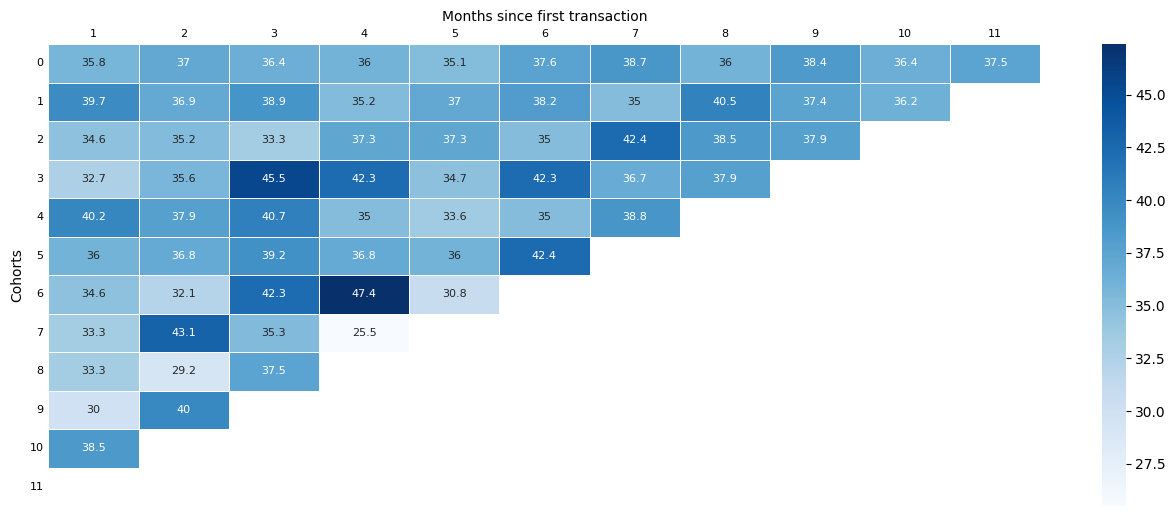

In [32]:
# creating a heatmap
fig, ax = plt.subplots(1,1,figsize=(16,6))
sns.heatmap(df_retention, annot=True, cmap='Blues',annot_kws={'size': 8},fmt='g',linewidths=.5)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.xaxis.set_label_coords(0.5, 1.05)

ax.set_xlabel('Months since first transaction')
ax.set_ylabel('Cohorts')
ax.tick_params(axis='both', which='both', length=0, rotation=0, labelsize=8)

# Reverse the order of x-axis labels
xticks = ax.get_xticks()
ax.set_xticks(xticks[::-1])
ax.set_xticklabels(df_retention.columns[::-1])

plt.show()

## Time-Series Analysis

In [100]:
df_model.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date_clean', 'online_order_cleaned', 'profit',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'age_group', 'recency'],
      dtype='object')

In [129]:
aggregation = {'transaction_id': 'count',
               'customer_id': 'nunique',
               'list_price': 'sum',
               'profit': 'sum',
               }
df_model_trends = df_model.copy()
df_model_trends['transaction_month'] = pd.to_datetime(df_model_trends['transaction_date']).dt.strftime('%Y-%m')
df_model_trends = df_model_trends.groupby('transaction_month')[['transaction_id','customer_id', 'list_price', 'profit']].agg(aggregation).reset_index()
df_model_trends.rename(columns={'transaction_id':'nmb_transactions', 'customer_id':'nmb_customers', 'list_price': 'sum_sales', 'profit': 'sum_profit'}, inplace = True)
df_model_trends['sum_sales'] = df_model_trends['sum_sales']/1000000
df_model_trends['sum_profit'] = df_model_trends['sum_profit']/1000000
df_model_trends

transaction_month  nmb_transactions  nmb_customers  sum_sales  sum_profit
0            2017-01              1160            947   1.286046    0.639429
1            2017-02              1162            929   1.293947    0.630157
2            2017-03              1163            931   1.291607    0.634696
3            2017-04              1172            932   1.317150    0.655239
4            2017-05              1186            929   1.343779    0.654765
5            2017-06              1079            883   1.204275    0.600365
6            2017-07              1149            926   1.272004    0.632699
7            2017-08              1206            957   1.334010    0.672973
8            2017-09              1086            877   1.203355    0.593783
9            2017-10              1225            967   1.373976    0.685697
10           2017-11              1175            930   1.282957    0.660070
11           2017-12              1147            925   1.237390    0.607194

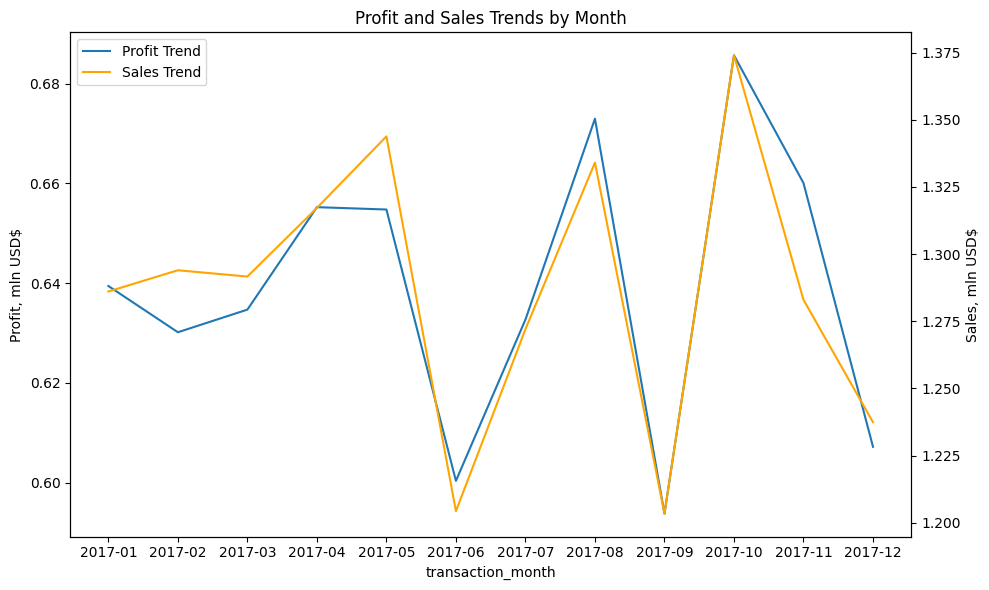

In [141]:
# Create the line chart
plt.figure(figsize=(10, 6))

# Plot the profit trend
ax1 = sns.lineplot(data=df_model_trends, x='transaction_month', y='sum_profit', errorbar=None, label='Profit Trend')

# Create a twin Axes sharing the xaxis for sales trend
ax2 = ax1.twinx()
sns.lineplot(data=df_model_trends, x='transaction_month', y='sum_sales', errorbar=None, ax=ax2, color='orange', label='Sales Trend')

# Set labels and titles
ax1.set_title('Profit and Sales Trends by Month')
ax1.set_ylabel('Profit, mln USD$')
ax2.set_ylabel('Sales, mln USD$')

# Show legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
ax1.legend().set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

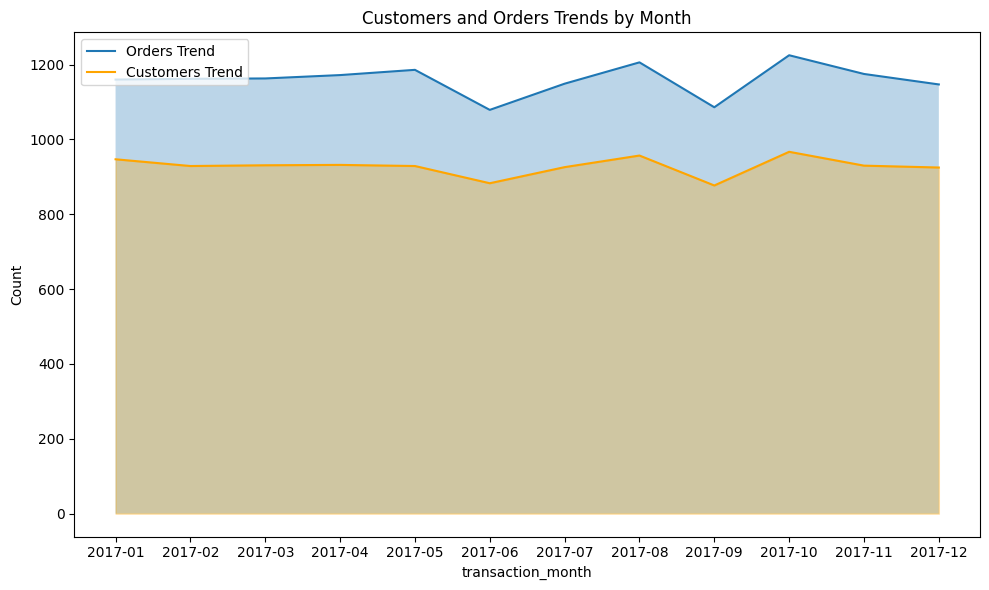

In [147]:
# Create the area chart
plt.figure(figsize=(10, 6))

# Plot the trends for number of customers and orders as area chart
sns.lineplot(data=df_model_trends, x='transaction_month', y='nmb_transactions', errorbar=None, label='Orders Trend')
sns.lineplot(data=df_model_trends, x='transaction_month', y='nmb_customers', errorbar=None, color='orange', label='Customers Trend')

# Fill the area
plt.fill_between(df_model_trends['transaction_month'], df_model_trends['nmb_transactions'], alpha=0.3)
plt.fill_between(df_model_trends['transaction_month'], df_model_trends['nmb_customers'], alpha=0.3, color='orange')

# Set labels and title
plt.title('Customers and Orders Trends by Month')
plt.ylabel('Count')

# Show legend
plt.legend(loc='upper left')

plt.xticks(rotation=0)
plt.tight_layout()

# Display the chart
plt.show()

## Visuals

In [191]:
pyg.walk(df_dim_customers, dark='light')

Box(children=(HTML(value='<div id="ifr-pyg-9" style="height: auto">\n    <head>\n        <meta http-equiv="Con…